## MLP多層感知器 ##
* 以Mnist資料集進行程式碼練習, 辦認0~9的數字
* 載入模型，預測其他20張數字圖片(小畫家自己手寫的)
# 載入自己手寫的數字
* 最初的模型預測準確率僅80% (8跟5容易錯)
* 後調整訓練模型時多加一層隱藏層
* 並且在隱藏層中皆拋棄10%
* 自己手寫的數字，準確率提高至95%

In [1]:
from keras.datasets import mnist #下載資料集
from sklearn.preprocessing import MinMaxScaler #feature正規化
from keras.utils import np_utils #Label處理one-hot-encoding
import matplotlib.pyplot as plt #畫出來
from keras.models import load_model
import numpy as np
np.random.seed(10)
import glob,cv2

Using TensorFlow backend.


In [2]:
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [3]:
import matplotlib.pyplot as plt
def show_images_labels_predictions(images, lables, predictions, start_id, num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[start_id], cmap='binary')

        if len(predictions)>0:
            title = 'pred = '+ str(predictions[start_id])
            title += ('(O)' if predictions[start_id]==lables[start_id] else '(X)')
            title += '\nlabel = '+ str(lables[start_id])
        else:
            title = 'label = '+ str(lables[start_id])

        ax.set_title(title, fontsize = 12)
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()

In [4]:
#建立測試資料
files = glob.glob('imagedata\*.jpg')
test_feature = []
test_label = []
for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    test_feature.append(img)
    label = file[10:11]
    test_label.append(int(label))

In [5]:
test_feature[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
#list轉成矩陣
test_feature = np.array(test_feature)
test_label = np.array(test_label)

In [7]:
test_label

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9])

In [8]:
test_label_onehot = np_utils.to_categorical(test_label)

In [9]:
test_label_onehot

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
#轉成784的一維向量
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')

In [11]:
test_feature_vector.shape

(20, 784)

In [12]:
#正規化
scaler = MinMaxScaler(feature_range=(0, 1))
test_feature_normalize = scaler.fit_transform(test_feature_vector)

In [13]:
print("載入模型 Mnist_mlp_model.h5")
model = load_model('Mnist_MLPmodle.h5')

載入模型 Mnist_mlp_model.h5


In [14]:
#評估準確率 evaluate()
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('準確率:{:.3f}'.format( scores[1]))

20/20 [==============================] - 0s 2ms/step
準確率:0.950


In [15]:
prediction=model.predict_classes(test_feature_normalize)

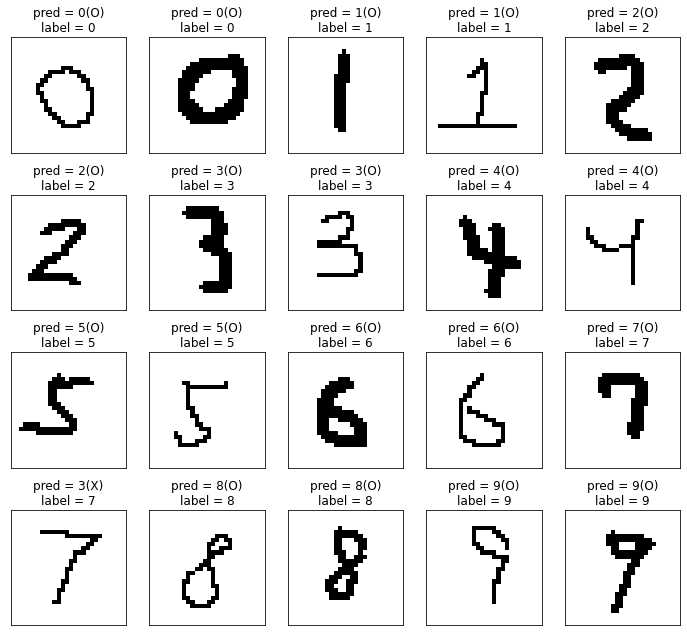

In [16]:
#顯示圖像、預測值、真實值
show_images_labels_predictions(test_feature,test_label,prediction,0,len(test_feature))